In [17]:
from dolfin import *
import numpy as np

# Definim una quadrícula 10x10 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(grad(u), grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Expression("0.25+(x[1]-0.5)*(x[1]-0.5)",degree=2)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("0.25+(x[1]-0.5)*(x[1]-0.5)",degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

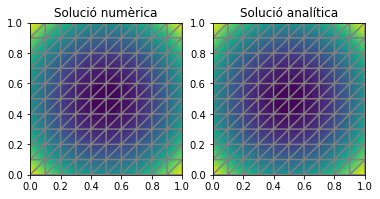

Error : 3.30e-16
Error local màxim : 5.55e-16


In [19]:
# Fem un plot de la solució
import matplotlib.pyplot as plt
plt.subplot(121)
plot(u)
plot(mesh)
plt.title("Solució numèrica")

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
u_a = Expression("(x[0]-0.5)*(x[0]-0.5)+(x[1]-0.5)*(x[1]-0.5)",degree=2)
u_a_V = interpolate(u_a,V) # agafem els valors de u_a només a l'espai V2

plt.subplot(122)
plot(u_a_V)
plot(mesh)
plt.title("Solució analítica")


plt.show()

# Calculem l'error
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
Emax = np.abs(u_a_V.vector().get_local() - u.vector().get_local()).max()
print(f"Error : {Emitj:.2e}")
print(f"Error local màxim : {Emax:.2e}")
E_1 = Emitj


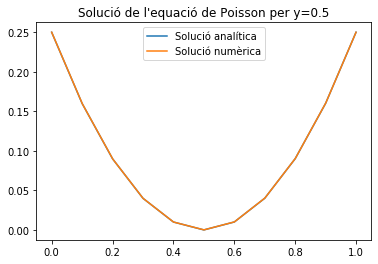

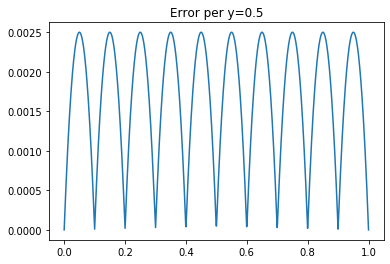

In [20]:
# Ara voldrem representar les funcions en 1 dimensió avaluant-les en y=0.5.
# Comencem amb la funció analítica
mesh_1d = IntervalMesh(10, 0, 1)
V_1d = FunctionSpace(mesh_1d, "Lagrange", 1)
u_a_y_05 = Expression("(x[0]-0.5)*(x[0]-0.5)",degree=2)
u_a_05_V = interpolate(u_a_y_05,V_1d)
plot(u_a_05_V, label='Solució analítica')


# Ara amb la funció numèrica
eix_x = np.linspace(0, 1, 1000)
u_y_05 = np.zeros(1000)

for i, x in enumerate(eix_x):
    u_y_05[i] = u(x,0.5)

    
plt.plot(eix_x, u_y_05, label= 'Solució numèrica')
plt.legend()
plt.title("Solució de l'equació de Poisson per y=0.5")

plt.show()

# Representem ara la diferència entre les dos funcions

error_05 = np.zeros(1000)
for i, x in enumerate(eix_x):
    error_05[i] = np.sqrt(u_y_05[i] - u_a_y_05(x)
plt.plot(eix_x, error_05)
plt.title("Error per y=0.5")

plt.show()

3.2843283377562676e-17
3.2967036211618715e-16
9.244058049477054e-16
2.195465244547153e-15


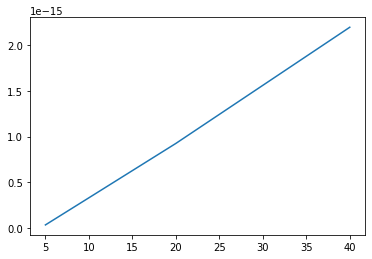

In [24]:
# Ara volem veure l'efecte de la discretització
n1=5
n2=10
n3=20
n4=40

# 1. 5x5 ______________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n1,n1)
V = FunctionSpace(mesh, "Lagrange", 1)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

Gamma_L = DirichletBC(V, u_L, left_boundary)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_1 = Emitj
print(Emitj)

# 2. 10x10 ____________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n2,n2)
V = FunctionSpace(mesh, "Lagrange", 1)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

Gamma_L = DirichletBC(V, u_L, left_boundary)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_2 = Emitj
print(Emitj)

# 3. 20x20 ___________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n3,n3)
V = FunctionSpace(mesh, "Lagrange", 1)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

Gamma_L = DirichletBC(V, u_L, left_boundary)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_3 = Emitj
print(Emitj)

# 4. 40x40 ___________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n4,n4)
V = FunctionSpace(mesh, "Lagrange", 1)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

Gamma_L = DirichletBC(V, u_L, left_boundary)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_4 = Emitj
print(Emitj)

# ____________________________________________________________________________________________________________________________

N=[n1,n2,n3,n4]
e_max=[E_1,E_2,E_3,E_4] 
plt.plot(N,e_max)
plt.show()

Calling FFC just-in-time (JIT) compiler, this may take some time.
7.602501404396579e-16
2.857035458875908e-15
5.511015709281567e-15
1.1122248085941886e-14


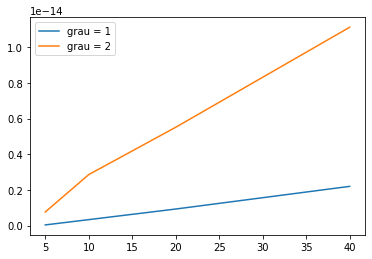

In [25]:
# 1. 5x5 ______________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n1,n1)
V = FunctionSpace(mesh, "Lagrange", 2)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

Gamma_L = DirichletBC(V, u_L, left_boundary)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_1_2 = Emitj
print(Emitj)

# 2. 10x10 ____________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n2,n2)
V = FunctionSpace(mesh, "Lagrange", 2)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

Gamma_L = DirichletBC(V, u_L, left_boundary)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_2_2 = Emitj
print(Emitj)

# 3. 20x20 ___________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n3,n3)
V = FunctionSpace(mesh, "Lagrange", 2)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

Gamma_L = DirichletBC(V, u_L, left_boundary)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_3_2 = Emitj
print(Emitj)

# 4. 40x40 ___________________________________________________________________________________________________________________

# Create mesh and define function space
mesh = UnitSquareMesh(n4,n4)
V = FunctionSpace(mesh, "Lagrange", 2)


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-4.0)
a = inner(nabla_grad(u), nabla_grad(v))*dx
g = Constant(1.0)
L = f*v*dx+ g*v*ds

Gamma_L = DirichletBC(V, u_L, left_boundary)
Gamma_R = DirichletBC(V, u_R, right_boundary)
bcs = [Gamma_L, Gamma_R]

# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

# Error
u_a_V = interpolate(u_a,V)
error = (u-u_a_V)**2*dx #error a cada punt de l'àrea
Emitj = sqrt(assemble(error))
E_4_2 = Emitj
print(Emitj)

# ____________________________________________________________________________________________________________________________

N=[n1,n2,n3,n4]

e_max_2=[E_1_2,E_2_2,E_3_2,E_4_2] 
plt.plot(N,e_max, label = 'grau = 1')
plt.plot(N,e_max_2,label = 'grau = 2')
plt.legend()
plt.show()